 # 1. Business Understanding

* Akan dilakukan pengelompokan data pada catatan pelanggan dari database perusahaan bahan makanan untuk memisahkan pelanggan ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara pelanggan di setiap cluster. 

* Pelanggan akan dibagi menjadi beberapa segmen untuk mengoptimalkan signifikansi setiap pelanggan bagi bisnis dan unntuk memodifikasi produk sesuai dengan kebutuhan dan perilaku pelanggan yang berbeda. 

*   Data yang digunakan merupakan data customer pada tahun 2012-2014.




# 2. Data Understanding

## Import Libraries

In [185]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Load Data

In [186]:
start = time()
df= pd.read_excel("/content/sample_data/marketing_campaign.xlsx")
end = time()

print("Done loading all datasets in {:.3f}s".format(end-start))

Done loading all datasets in 0.862s


In [187]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [188]:
df.shape

(2240, 29)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [190]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Insight :
1. Terdapat missing value pada bagian Income
2. Bagian Dt_Customer masih bertipe object, jadi nanti bakal diubah ke bentuk Datetime

In [191]:
#menghilangkan seluruh massing value
df=df.dropna()
print("Jumlah data setelah menghapus missing value:", len(df))

Jumlah data setelah menghapus missing value: 2216


In [192]:
#mengubah tipe data Dt_Customer
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
print("Tanggal pendaftaran terbaru:",max(dates))
print("Tanggal pendaftaran terlama:",min(dates))

Tanggal pendaftaran terbaru: 2014-06-29
Tanggal pendaftaran terlama: 2012-07-30


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## Feature Engineering

In [194]:
#Membuat fitur ("Customer_For") dari jumlah hari pelanggan mulai berbelanja di toko relatif terhadap tanggal terakhir yang tercatat
days = []
d1 = max(dates) 
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [195]:
for feature in df.columns:
    print(
        f"- num of unique values in `{feature}`:",
        df[feature].nunique()
    )

- num of unique values in `ID`: 2216
- num of unique values in `Year_Birth`: 59
- num of unique values in `Education`: 5
- num of unique values in `Marital_Status`: 8
- num of unique values in `Income`: 1974
- num of unique values in `Kidhome`: 3
- num of unique values in `Teenhome`: 3
- num of unique values in `Dt_Customer`: 662
- num of unique values in `Recency`: 100
- num of unique values in `MntWines`: 776
- num of unique values in `MntFruits`: 158
- num of unique values in `MntMeatProducts`: 554
- num of unique values in `MntFishProducts`: 182
- num of unique values in `MntSweetProducts`: 176
- num of unique values in `MntGoldProds`: 212
- num of unique values in `NumDealsPurchases`: 15
- num of unique values in `NumWebPurchases`: 15
- num of unique values in `NumCatalogPurchases`: 14
- num of unique values in `NumStorePurchases`: 14
- num of unique values in `NumWebVisitsMonth`: 16
- num of unique values in `AcceptedCmp3`: 2
- num of unique values in `AcceptedCmp4`: 2
- num of u

In [196]:
#cek unik data dari kolom Marital_Status dan Education
print("Total masing-masing kategori pada kolom Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total masing-masing kategori pada kolom Education:\n", df["Education"].value_counts())

Total masing-masing kategori pada kolom Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total masing-masing kategori pada kolom Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [197]:
#mencari tau umur costumer berdasarkan data Year_Birth
df["Age"] = 2021-df["Year_Birth"]

In [198]:
#Total seluruh pengeluaran
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [199]:
#Total anak
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [200]:
#Ukuran keluarga
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [201]:
#educarion dibagi dalam 3 kelompok
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [202]:
#mengubah nama-nama produk
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [203]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Children,Living_With,Family_Size
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57283200000000000,64,1617,0,Alone,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,9763200000000000,67,27,2,Alone,3
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,26956800000000000,56,776,0,Partner,2
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,12009600000000000,37,53,1,Partner,3
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,13910400000000000,40,422,1,Partner,3
5,7446,1967,Postgraduate,Together,62513.0,0,1,2013-09-09,16,520,...,0,3,11,0,25315200000000000,54,716,1,Partner,3
6,965,1971,Graduate,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,3,11,0,51235200000000000,50,590,1,Alone,2
7,6177,1985,Postgraduate,Married,33454.0,1,0,2013-05-08,32,76,...,0,3,11,0,36028800000000000,36,169,1,Partner,3
8,4855,1974,Postgraduate,Together,30351.0,1,0,2013-06-06,19,14,...,0,3,11,1,33523200000000000,47,46,1,Partner,3
9,5899,1950,Postgraduate,Together,5648.0,1,1,2014-03-13,68,28,...,0,3,11,0,9331200000000000,71,49,2,Partner,4


In [204]:
#mengambil beberapa kolom
df=df[['Dt_Customer','Age', 'Spent', 'Income','Family_Size', 'Education','Wines','Fruits','Meat','Fish','Sweets','Gold', 
       'Customer_For','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Recency','Complain']]
df.head(20)

,Dt_Customer,Age,Spent,Income,Family_Size,Education,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_For,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,Complain
0,2012-09-04,64,1617,58138.0,1,Graduate,635,88,546,172,88,88,57283200000000000,3,8,10,4,58,0
1,2014-03-08,67,27,46344.0,3,Graduate,11,1,6,2,1,6,9763200000000000,2,1,1,2,38,0
2,2013-08-21,56,776,71613.0,2,Graduate,426,49,127,111,21,42,26956800000000000,1,8,2,10,26,0
3,2014-02-10,37,53,26646.0,3,Graduate,11,4,20,10,3,5,12009600000000000,2,2,0,4,26,0
4,2014-01-19,40,422,58293.0,3,Postgraduate,173,43,118,46,27,15,13910400000000000,5,5,3,6,94,0
5,2013-09-09,54,716,62513.0,3,Postgraduate,520,42,98,0,42,14,25315200000000000,2,6,4,10,16,0
6,2012-11-13,50,590,55635.0,2,Graduate,235,65,164,50,49,27,51235200000000000,4,7,3,7,34,0
7,2013-05-08,36,169,33454.0,3,Postgraduate,76,10,56,3,1,23,36028800000000000,2,4,0,4,32,0
8,2013-06-06,47,46,30351.0,3,Postgraduate,14,0,24,3,3,2,33523200000000000,1,3,0,2,19,0
9,2014-03-13,71,49,5648.0,4,Postgraduate,28,0,6,1,1,13,9331200000000000,1,1,0,0,68,0


In [205]:
df.describe()

,Age,Spent,Income,Family_Size,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_For,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52.179603,607.075361,52247.251354,2.592509,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,3.054423e+16,2.323556,4.085289,2.671029,5.800993,49.012635,0.009477
std,11.985554,602.900476,25173.076661,0.905722,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.749036e+16,1.923716,2.740951,2.926734,3.250785,28.948352,0.096907
min,25.000000,5.000000,1730.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,69.000000,35303.000000,2.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.555200e+16,1.000000,2.000000,0.000000,3.000000,24.000000,0.000000
50%,51.000000,396.500000,51381.500000,3.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,3.071520e+16,2.000000,4.000000,2.000000,5.000000,49.000000,0.000000
75%,62.000000,1048.000000,68522.000000,3.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,4.570560e+16,3.000000,6.000000,4.000000,8.000000,74.000000,0.000000
max,128.000000,2525.000000,666666.000000,5.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,6.039360e+16,15.000000,27.000000,28.000000,13.000000,99.000000,1.000000


## Summary Statistic

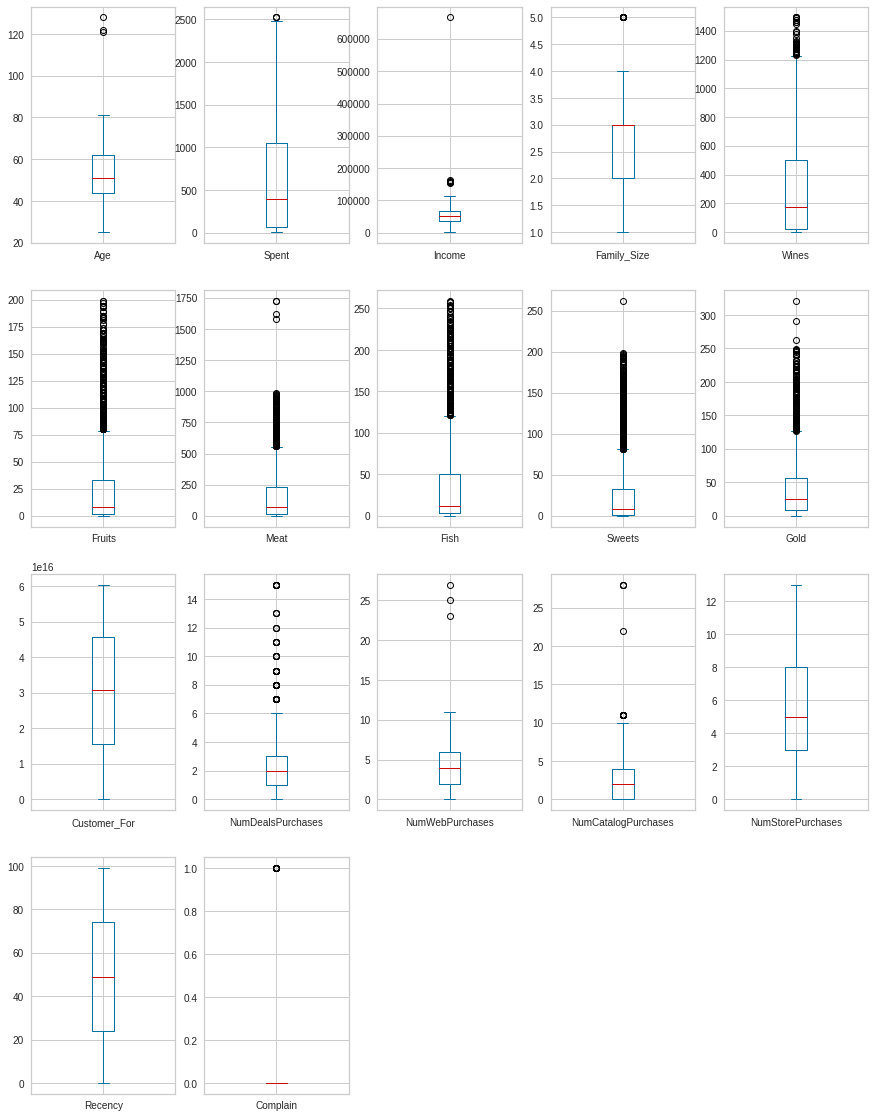

In [206]:
#melihat outlier masing-masing fitur
df.plot(kind='box', subplots = True, layout = (4,5), figsize = (15,20))
plt.show()

In [207]:
#remove outlier
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("Jumlah data setelah menghapus outlier:", len(df))

Jumlah data setelah menghapus outlier: 2212


### Data Visualization

In [208]:
def plot_count(data, x=None, y=None, palette=None, figsize=(20, 10), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

#### Usia

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


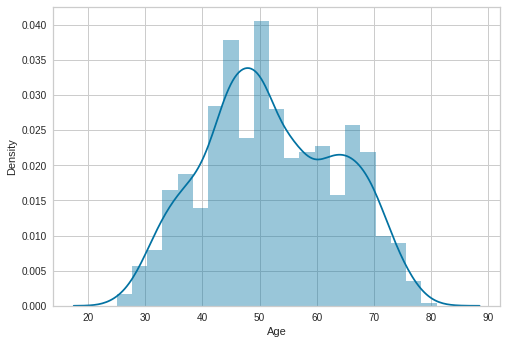

In [209]:
#melihat pesebaran usia
sns.distplot(df['Age'])
plt.show()

Usia berapakah yang paling sering belanja?

In [210]:
df['Age'].agg([max, min, np.sum, np.mean, 'count'])

max          81.000000
min          25.000000
sum      115215.000000
mean         52.086347
count      2212.000000
Name: Age, dtype: float64

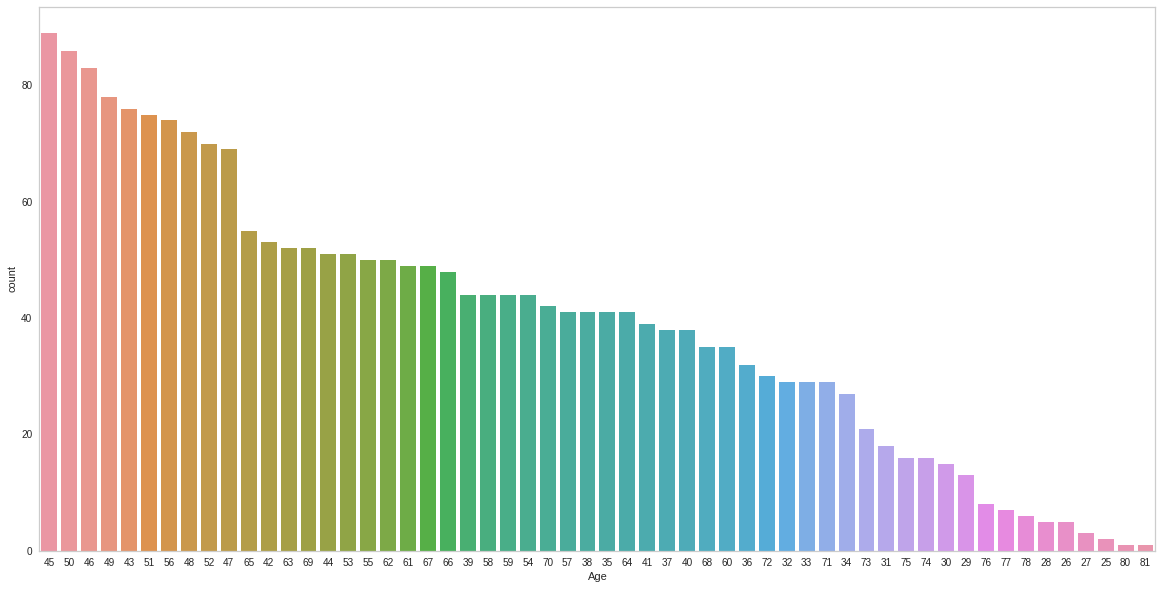

In [211]:
plot_count(x="Age", data=df)

> Insights:
        
1. Pembeli didominasi oleh usia 45 tahun
2. rata2 pembeli berusia 52 tahun
3. pemeli termuda berusia 25 tahun
4. pembeli tertua berusia 81 tahun

### Family Size 

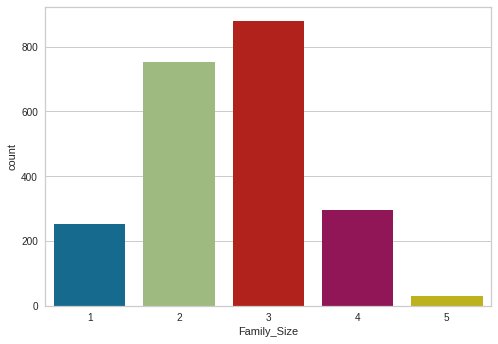

In [212]:
#melihat total masing-masing ukuran keluarga
sns.countplot(x=df['Family_Size'])
plt.show()

Apakah Jumlah keluarga mempengaruhi pengeluaran ?

In [213]:
df.groupby('Family_Size')['Spent'].agg([max, min, np.sum, np.mean, 'count'])

,max,min,sum,mean,count
Family_Size,,,,,
1,2525,6,279022,1107.230159,252
2,2524,5,592375,785.643236,754
3,2194,10,389746,443.397042,879
4,1392,9,72864,246.162162,296
5,1616,8,9270,299.032258,31


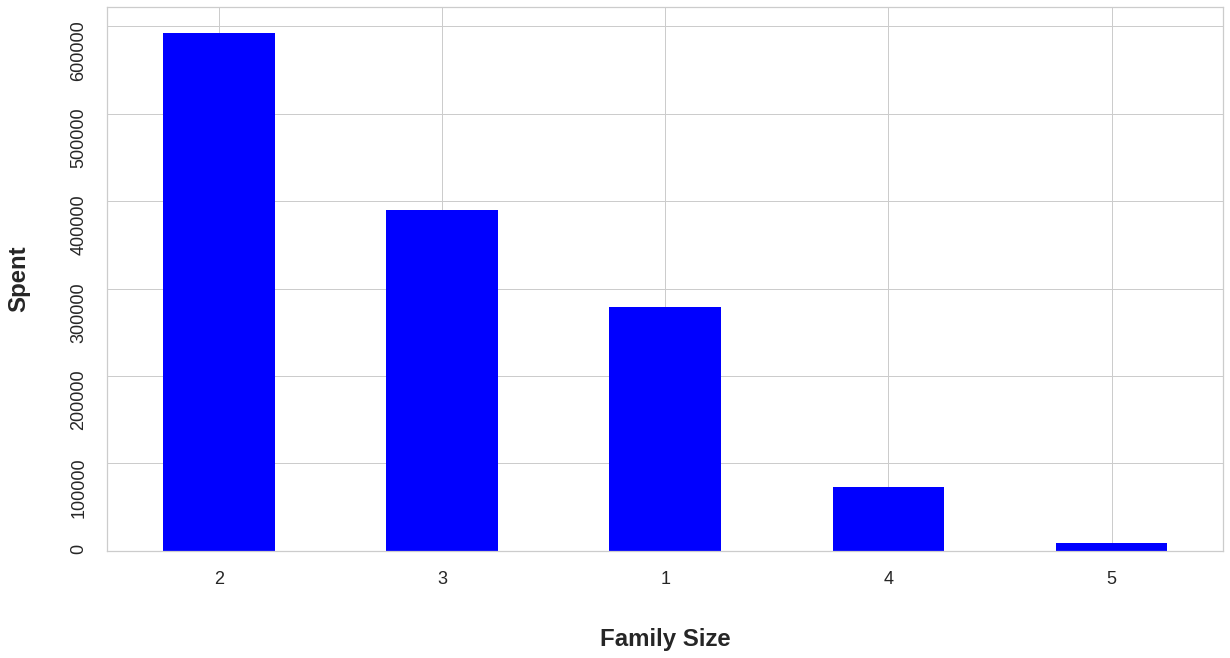

In [214]:
dfa=df.groupby('Family_Size')['Spent'].agg(['sum']).reset_index().nlargest(10,'sum')

dfa.plot(x='Family_Size', y='sum',kind="bar", figsize=(20,10), legend = None, color='blue')
plt.xlabel('Family Size', fontsize=24, fontweight='bold', labelpad=40)
plt.ylabel('Spent', fontsize=24, fontweight='bold',labelpad=40)

plt.tick_params(axis='x', which='major', labelsize=18, pad=20, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=18, pad=20, rotation=90)
 
plt.show()
 
plt.show()

In [215]:
df.groupby('Family_Size')['Wines','Fruits','Meat'].agg([max, min, np.sum, np.mean, 'count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Wines                               Fruits                        \
              max min     sum        mean count    max min    sum       mean   
Family_Size                                                                    
1            1462   0  123782  491.198413   252    194   0  13180  52.301587   
2            1493   0  283224  375.628647   754    199   0  27254  36.145889   
3            1492   0  218966  249.108077   879    193   0  15273  17.375427   
4            1099   1   43157  145.800676   296    123   0   2339   7.902027   
5            1279   2    6167  198.935484    31     59   0    195   6.290323   

                   Meat                                
            count   max min     sum        mean count  
Family_Size                                            
1             252   984   0   93570  371.309524   252  
2             754  1725   1  175258  232.437666   754  
3             879  1725   1   83730   95.255973   879  
4             296   650   1   14944   50.486486   296  
5              31   487   1    1968   63.483871    31

### Education

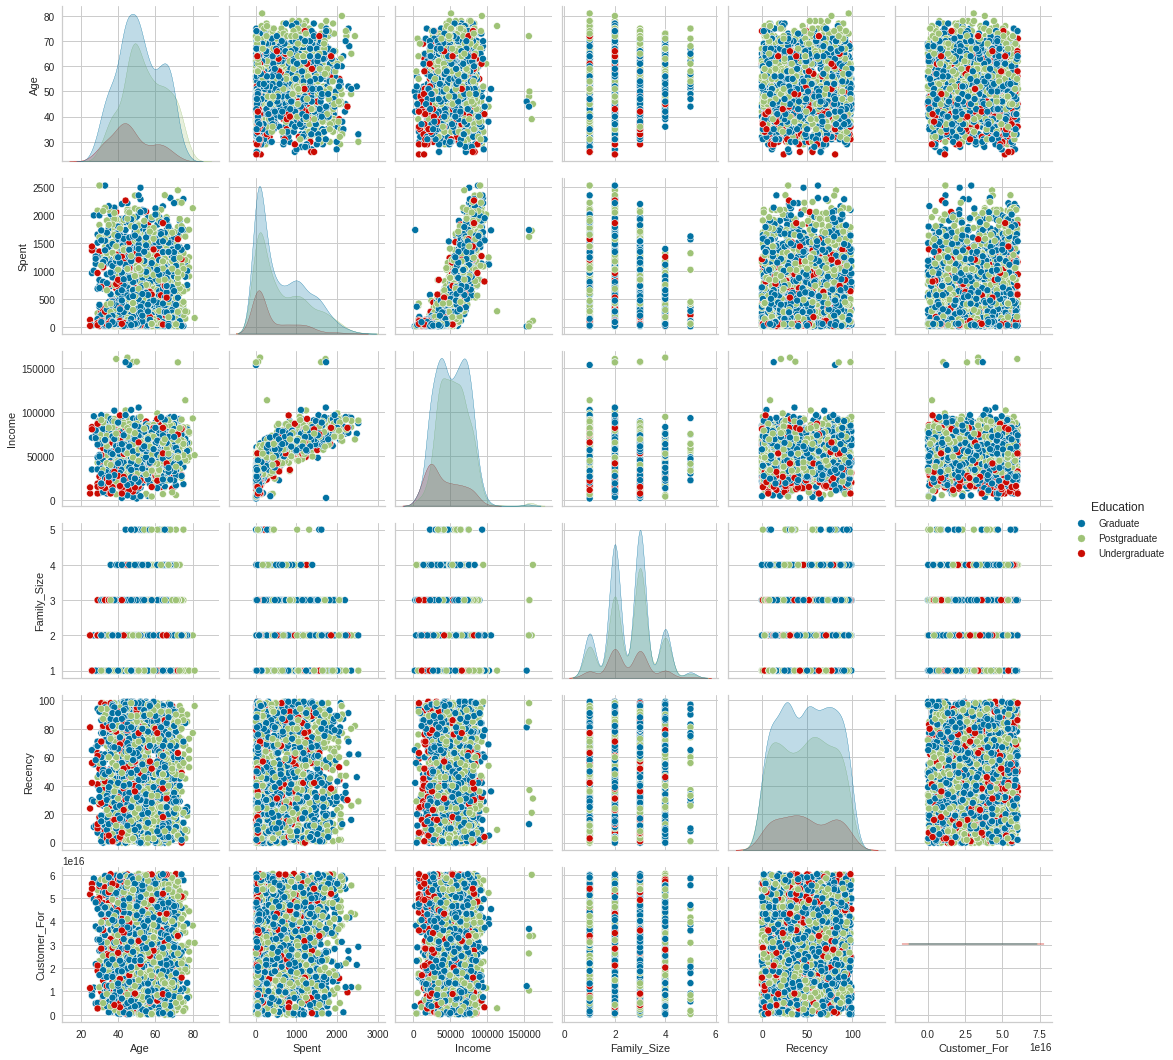

In [216]:
sns.pairplot(data=df[['Dt_Customer','Age', 'Spent', 'Income','Family_Size', 'Education', 'Recency','Customer_For']], hue='Education')
plt.show()

### Correlation

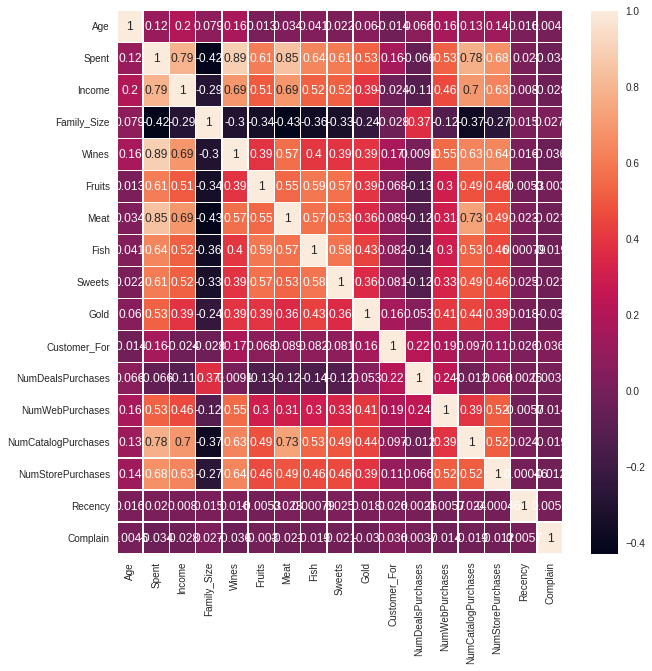

In [217]:
#menampilkan korelasi setiap jenis data
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

Terdapat beberapa variabel yang memiliki korelasi kuat seperti


1. Spent dengan Income
2. Spent dengan Wines
3. Spent dengan Meat
4. Spend dengan Catalog Purchase




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Income vs Spent')

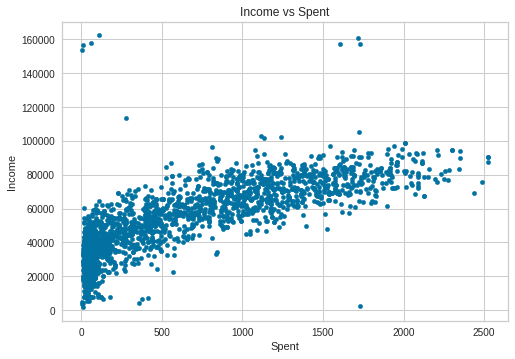

In [218]:
df.plot.scatter(x='Spent', y='Income')
plt.title('Income vs Spent')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Wines vs Spent')

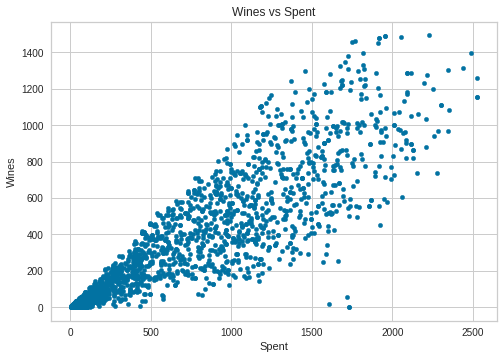

In [219]:
df.plot.scatter(x='Spent', y='Wines')
plt.title('Wines vs Spent')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Meat vs Spent')

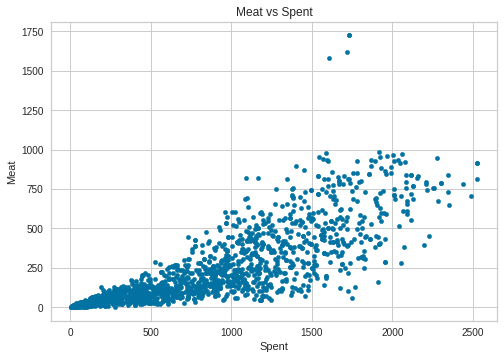

In [220]:
df.plot.scatter(x='Spent', y='Meat')
plt.title('Meat vs Spent')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'NumCatalogPurchases vs Spent')

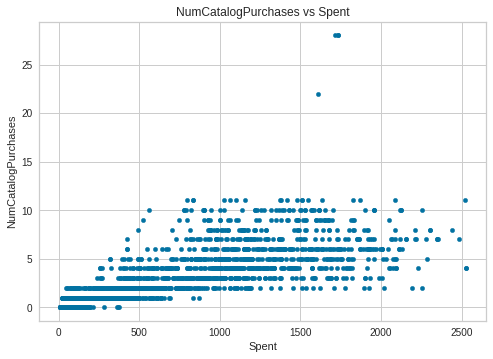

In [221]:
df.plot.scatter(x='Spent', y='NumCatalogPurchases')
plt.title('NumCatalogPurchases vs Spent')

# 3. Data Preparation

In [222]:
from sklearn import preprocessing

In [223]:
df2 = df
df2

,Dt_Customer,Age,Spent,Income,Family_Size,Education,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_For,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,Complain
0,2012-09-04,64,1617,58138.0,1,Graduate,635,88,546,172,88,88,57283200000000000,3,8,10,4,58,0
1,2014-03-08,67,27,46344.0,3,Graduate,11,1,6,2,1,6,9763200000000000,2,1,1,2,38,0
2,2013-08-21,56,776,71613.0,2,Graduate,426,49,127,111,21,42,26956800000000000,1,8,2,10,26,0
3,2014-02-10,37,53,26646.0,3,Graduate,11,4,20,10,3,5,12009600000000000,2,2,0,4,26,0
4,2014-01-19,40,422,58293.0,3,Postgraduate,173,43,118,46,27,15,13910400000000000,5,5,3,6,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2013-06-13,54,1341,61223.0,3,Graduate,709,43,182,42,118,247,32918400000000000,2,9,3,4,46,0
2236,2014-06-10,75,444,64014.0,5,Postgraduate,406,0,30,0,0,8,1641600000000000,7,8,2,5,56,0
2237,2014-01-25,40,1241,56981.0,1,Graduate,908,48,217,32,12,24,13392000000000000,1,2,3,13,91,0
2238,2014-01-24,65,843,69245.0,3,Postgraduate,428,30,214,80,30,61,13478400000000000,2,6,5,10,8,0


In [224]:
df2.dtypes

Dt_Customer            datetime64[ns]
Age                             int64
Spent                           int64
Income                        float64
Family_Size                     int64
Education                      object
Wines                           int64
Fruits                          int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
Customer_For                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
Recency                         int64
Complain                        int64
dtype: object

## Label encoding the categorical features

In [225]:
s = (df2.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [226]:
LE = preprocessing.LabelEncoder()
for i in object_cols:
    df2[i]=df2[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [227]:
df2

,Dt_Customer,Age,Spent,Income,Family_Size,Education,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_For,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,Complain
0,2012-09-04,64,1617,58138.0,1,0,635,88,546,172,88,88,57283200000000000,3,8,10,4,58,0
1,2014-03-08,67,27,46344.0,3,0,11,1,6,2,1,6,9763200000000000,2,1,1,2,38,0
2,2013-08-21,56,776,71613.0,2,0,426,49,127,111,21,42,26956800000000000,1,8,2,10,26,0
3,2014-02-10,37,53,26646.0,3,0,11,4,20,10,3,5,12009600000000000,2,2,0,4,26,0
4,2014-01-19,40,422,58293.0,3,1,173,43,118,46,27,15,13910400000000000,5,5,3,6,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2013-06-13,54,1341,61223.0,3,0,709,43,182,42,118,247,32918400000000000,2,9,3,4,46,0
2236,2014-06-10,75,444,64014.0,5,1,406,0,30,0,0,8,1641600000000000,7,8,2,5,56,0
2237,2014-01-25,40,1241,56981.0,1,0,908,48,217,32,12,24,13392000000000000,1,2,3,13,91,0
2238,2014-01-24,65,843,69245.0,3,1,428,30,214,80,30,61,13478400000000000,2,6,5,10,8,0


## Scaling the features using the standard scaler 

In [228]:
ds = df2.copy()
cols_del = ['Dt_Customer']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [229]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Age,Spent,Income,Family_Size,Education,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_For,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,Complain
0,1.018352,1.676245,0.287105,-1.758359,-0.893586,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,1.527721,0.351030,1.426865,2.503607,-0.555814,0.310353,-0.09552
1,1.274785,-0.963297,-0.260882,0.449070,-0.893586,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-1.189011,-0.168701,-1.126420,-0.571340,-1.171160,-0.380813,-0.09552
2,0.334530,0.280110,0.913196,-0.654644,-0.893586,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.206048,-0.688432,1.426865,-0.229679,1.290224,-0.795514,-0.09552
3,-1.289547,-0.920135,-1.176114,0.449070,-0.893586,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-1.060584,-0.168701,-0.761665,-0.913000,-0.555814,-0.795514,-0.09552
4,-1.033114,-0.307562,0.294307,0.449070,0.571657,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,-0.951915,1.390492,0.332600,0.111982,0.059532,1.554453,-0.09552


# 4. Modeling

## Menetukan Jumlah Cluster

In [230]:
scr = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(scaled_ds)
    scr_=kmeans.inertia_
    scr.append(scr_)
    print(i, scr_)

1 39815.999999999956
2 28150.730671379875
3 25345.145720605637
4 23224.297006061548
5 22327.333954954247
6 21345.226986147827
7 20444.96397398651
8 19809.130157945947
9 19359.442140717867


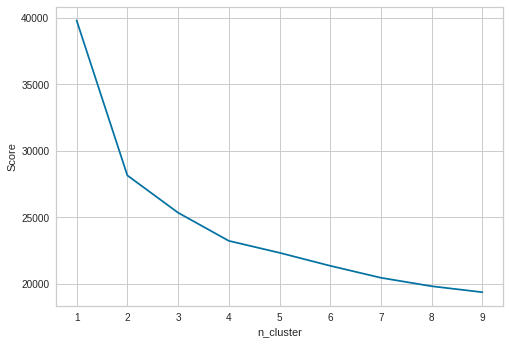

In [231]:
plt.plot(index,scr)
plt.xlabel('n_cluster')
plt.ylabel('Score')
plt.show()

> **Insights:**
    Dari grafik di atas,kita dapat melihat bawa pada iterasi kedua terjadi perubahan yang signifikat

## Testing Data dengan 2 Cluster

In [232]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_ds)

KMeans(n_clusters=2)

In [233]:
#Menambahkan cluster ke dalam dataframe
scaled_ds['cluster']= kmeans.labels_

In [234]:
scaled_ds

,Age,Spent,Income,Family_Size,Education,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_For,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency,Complain,cluster
0,1.018352,1.676245,0.287105,-1.758359,-0.893586,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,1.527721,0.351030,1.426865,2.503607,-0.555814,0.310353,-0.09552,1
1,1.274785,-0.963297,-0.260882,0.449070,-0.893586,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-1.189011,-0.168701,-1.126420,-0.571340,-1.171160,-0.380813,-0.09552,0
2,0.334530,0.280110,0.913196,-0.654644,-0.893586,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.206048,-0.688432,1.426865,-0.229679,1.290224,-0.795514,-0.09552,1
3,-1.289547,-0.920135,-1.176114,0.449070,-0.893586,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-1.060584,-0.168701,-0.761665,-0.913000,-0.555814,-0.795514,-0.09552,0
4,-1.033114,-0.307562,0.294307,0.449070,0.571657,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,-0.951915,1.390492,0.332600,0.111982,0.059532,1.554453,-0.09552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.163575,1.218061,0.430444,0.449070,-0.893586,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,0.134778,-0.168701,1.791619,0.111982,-0.555814,-0.104347,-0.09552,1
2208,1.958607,-0.271040,0.560123,2.656499,0.571657,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,-1.653326,2.429954,1.426865,-0.229679,-0.248141,0.241237,-0.09552,0
2209,-1.033114,1.052052,0.233347,-1.758359,-0.893586,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.981552,-0.688432,-0.761665,0.111982,2.213242,1.450778,-0.09552,1
2210,1.103830,0.391336,0.803172,0.449070,0.571657,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.976612,-0.168701,0.697355,0.795303,1.290224,-1.417564,-0.09552,1


## Menampilkan Grafik Cluster

(array([1327.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         885.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

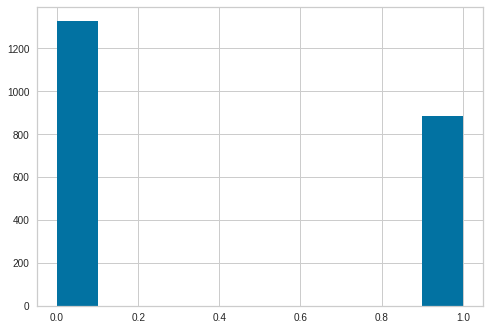

In [235]:
plt.hist(scaled_ds['cluster'])

In [236]:
x = scaled_ds['cluster']

# 5. Evaluasi

## Elbow Method

In [238]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(scaled_ds)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.033s
Clustering with n_clusters=2
Done clustering in 0.140s
Clustering with n_clusters=3
Done clustering in 0.284s
Clustering with n_clusters=4
Done clustering in 0.287s
Clustering with n_clusters=5
Done clustering in 0.369s
Clustering with n_clusters=6
Done clustering in 0.824s
Clustering with n_clusters=7
Done clustering in 1.100s
Clustering with n_clusters=8
Done clustering in 0.328s
Clustering with n_clusters=9
Done clustering in 0.539s
Clustering with n_clusters=10
Done clustering in 0.433s


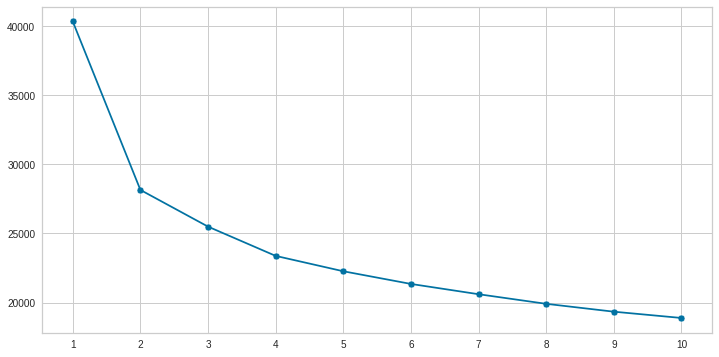

In [239]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=ssd)
sns.scatterplot(x=range(1, 11), y=ssd)
plt.xticks(range(1, 11))
plt.show()

> **Insights:**
Dari hasil evaluasi dapat dilihat bahwa cluster 2 merupakan cluster yang optimal

## Visualisasi

In [240]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [241]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.008837e-16,2.611044,-4.088670,-2.441430,-0.729469,2.28073,7.178091
col2,2212.0,4.386686e-17,1.300490,-3.010324,-0.932946,-0.225073,0.73011,5.535582
col3,2212.0,-2.760500e-18,1.066604,-3.190702,-0.766326,-0.011459,0.71950,3.874374


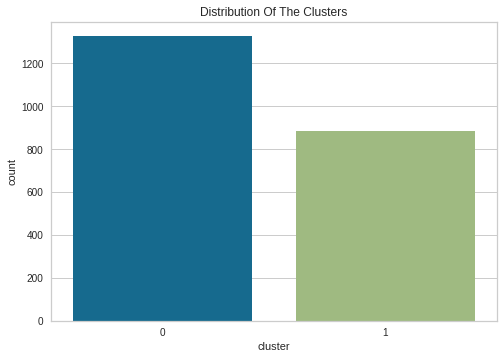

In [243]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=scaled_ds["cluster"], palette= None)
pl.set_title("Distribution Of The Clusters")
plt.show()

###  Income & Spent

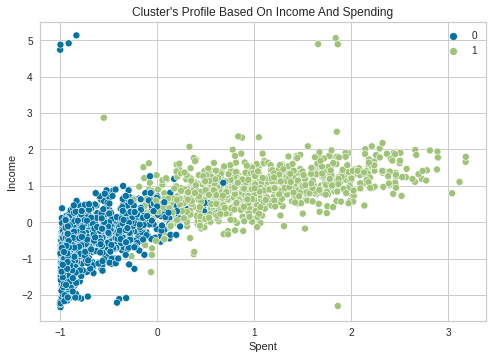

In [244]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["Income"],hue=scaled_ds["cluster"], palette= None)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()

plt.show()

insight:
*   Cluster 0 = memiliki income yang tinggi dan pengeluaran yang tinggi
*   Cluster 1 = memiliki income yang rendah dan pengeluaran yang rendah



### Wines & Spent

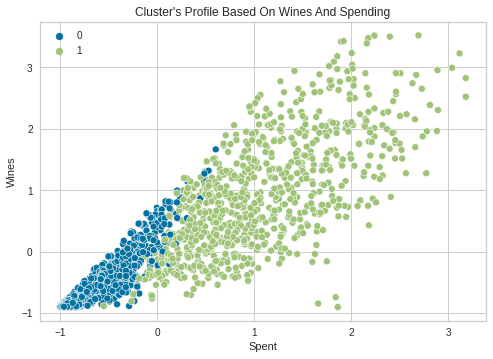

In [246]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["Wines"],hue=scaled_ds["cluster"], palette= None)
pl.set_title("Cluster's Profile Based On Wines And Spending")
plt.legend()
plt.show()

### Meat & Spent

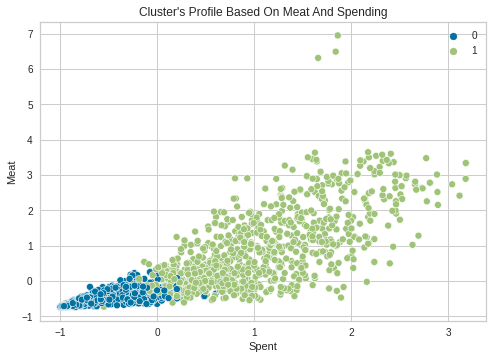

In [247]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["Meat"],hue=scaled_ds["cluster"], palette= None)
pl.set_title("Cluster's Profile Based On Meat And Spending")
plt.legend()
plt.show()

### Catalog & Spent

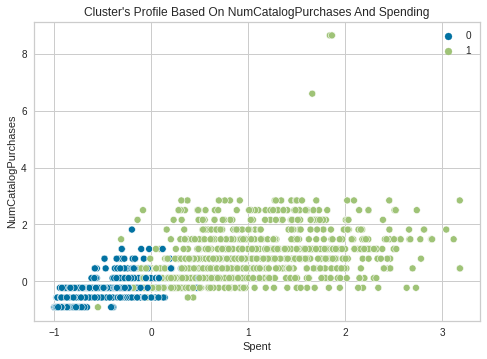

In [245]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["NumCatalogPurchases"],hue=scaled_ds["cluster"], palette= None)
pl.set_title("Cluster's Profile Based On NumCatalogPurchases And Spending")
plt.legend()
plt.show()